In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pmdarima import auto_arima

C:\Users\amrro\AppData\Local\Temp\ipykernel_15564\2481574773.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=dateParse)


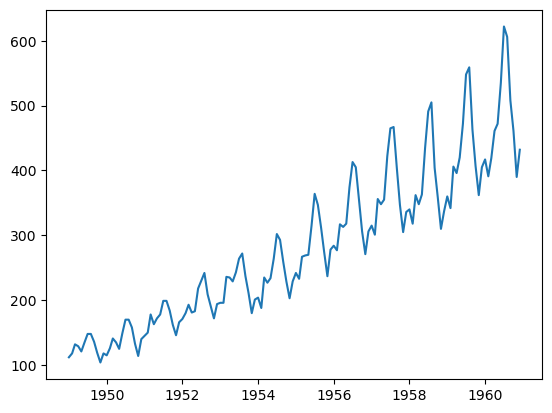

In [10]:
dateParse = lambda dates: datetime.strptime(dates, "%Y-%m")
data = pd.read_csv("AirPassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=dateParse)
plt.plot(data)
plt.show()

In [26]:
model = auto_arima(data, seasonal=True, m=12)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 18 Sep 2024   AIC                           1017.847
Time:                                     13:44:37   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3128     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

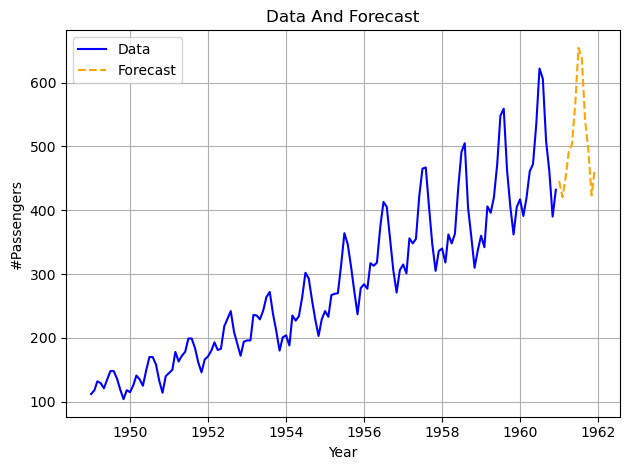

In [40]:
forecast = model.predict(n_periods=12)


plt.plot(data, label="Data", color='blue', linestyle='-')
plt.plot(forecast, label="Forecast", color='orange', linestyle='--')
plt.title("Data And Forecast")
plt.xlabel("Year")
plt.ylabel("#Passengers")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()